<h2 style="text-align:center; font-weight: 700;">Optimizers for Supervised Deep Learning models</h2>

In [26]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

#### Input

In [27]:
X, Y = [0.5, 2.5], [0.2, 0.9]

#### Necessary auxiliary functions

##### Activation -> Binary Sigmoidal

In [28]:
def binary_sigmoidal(yin):
  return (1 / (1 + np.exp(-yin)))

##### Predictor function

In [29]:
def predict_y(x, w, b):
  if type(x) == list or type(x) == tuple:
    yin = np.dot(x, w) + b
  else:
    yin = x * w + b
  yhat = binary_sigmoidal(yin)
  return yhat

##### Gradient functions

In [30]:
def delta_w(x, y, yhat):
  return (-2 * (y - yhat) * (yhat * (1 - yhat)) * x)

def delta_b(y, yhat):
  return (-2 * (y - yhat) * (yhat * (1 - yhat)))

#### Function to plot Error vs. Weight and Bias

In [31]:
def plotter(yhats, errors, weights, biases):
  fig = plt.figure(figsize=(15, 10))
  ax = plt.axes(projection = '3d')
  ax.set_xlabel("Weight (w)")
  ax.set_ylabel("Bias (b)")
  ax.set_zlabel("Squared Loss")
  ax.plot3D(np.array(weights), np.array(biases), np.array(errors), marker='o', markersize=3)
  plt.show()

  fig = plt.figure(figsize=(8, 5))
  plt.xlabel("Epochs")
  plt.ylabel("Error")
  plt.title("Squared error v/s Epochs")
  plt.plot([i for i in range(len(errors))], errors)

#### Stochastic Gradient Descent

In [32]:
def stochastic_gd(X, Y, noofepochs = 300):
  w, b = -2, -2     # weight and bias
  α = 1           # learning rate
  
  y_hats, errors, weights, biases = [], [], [], []
  for epoch in range(noofepochs):

    # for each epoch there is an updation noofrows times, here 2 => 300 x 2 = 600 calcs
    for x, y in zip(X, Y):
      yhat = predict_y(x, w, b)
      sqerror = (y - yhat) ** 2
      w += (-α * delta_w(x, y, yhat))
      b += (-α * delta_b(y, yhat))
    
    y_hats.append(yhat)
    errors.append(sqerror)
    weights.append(w)
    biases.append(b)

  return y_hats, errors, weights, biases

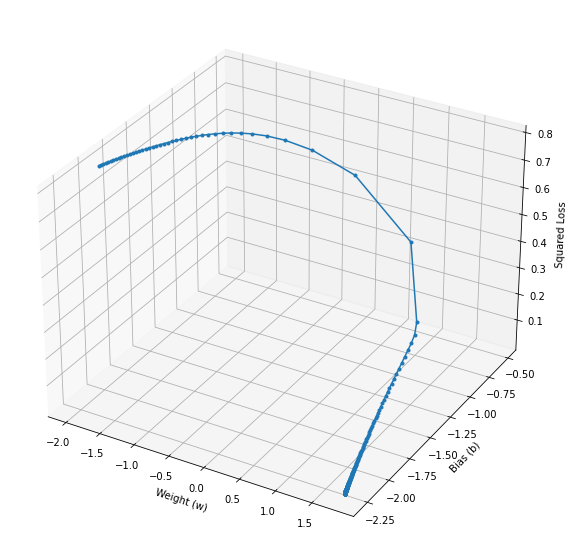

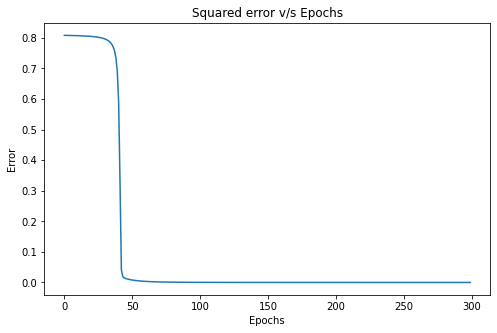

In [33]:
y_hats_sgd, errors_sgd, weights_sgd, biases_sgd = stochastic_gd(X, Y)
plotter(y_hats_sgd, errors_sgd, weights_sgd, biases_sgd)

#### Batch Gradient Descent

In [34]:
def batch_gd(X, Y, noofepochs = 300):
  w, b = -2, -2     # weight and bias
  α = 1           # learning rate
  dw, db = 0, 0
  y_hats, errors, weights, biases = [], [], [], []
  for epoch in range(noofepochs):

    # for each epoch there is an updation exactly once
    for x, y in zip(X, Y):
      yhat = predict_y(x, w, b)
      sqerror = (y - yhat) ** 2
      dw += delta_w(x, y, yhat)
      db += delta_b(y, yhat)
    
    w += -α * (dw / 2)        # knowingly halving it cause only 2 points
    b += -α * (db / 2)
    dw, db = 0, 0
    y_hats.append(yhat)
    errors.append(sqerror)
    weights.append(w)
    biases.append(b)

  return y_hats, errors, weights, biases

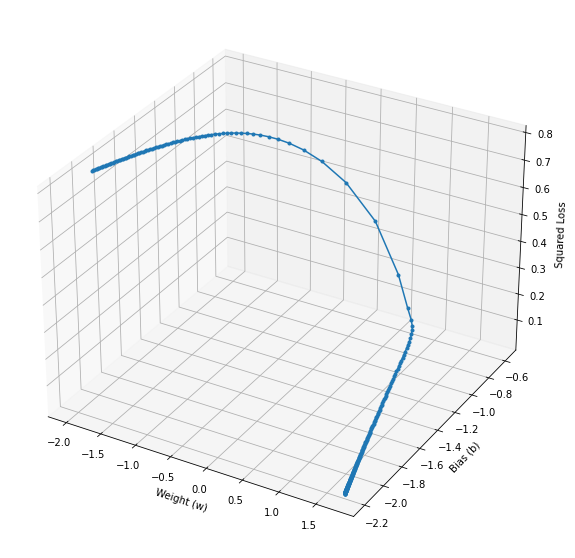

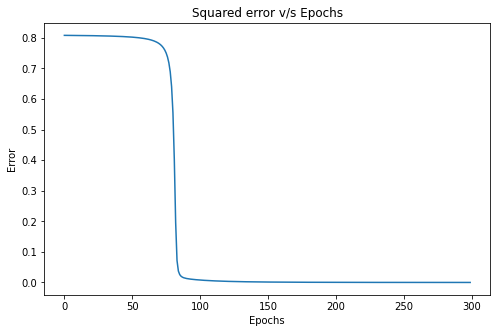

In [35]:
y_hats_bgd, errors_bgd, weights_bgd, biases_bgd = batch_gd(X, Y)
plotter(y_hats_bgd, errors_bgd, weights_bgd, biases_bgd)

#### Mini-batch Gradient Descent

In [36]:
def mini_batch_gd(X, Y, noofepochs = 300, batch_size = 2):
  w, b = -2, -2     # weight and bias
  α = 1           # learning rate
  dw, db = 0, 0
  curr_count = 0
  y_hats, errors, weights, biases = [], [], [], []

  for epoch in range(noofepochs):
    for x, y in zip(X, Y):
      yhat = predict_y(x, w, b)
      sqerror = (y - yhat) ** 2
      dw += delta_w(x, y, yhat)
      db += delta_b(y, yhat)
      curr_count += 1
      if curr_count % batch_size == 0:
        w += -α * (dw / batch_size)
        b += -α * (db / batch_size)
        dw, db = 0, 0
        
    y_hats.append(yhat)
    errors.append(sqerror)
    weights.append(w)
    biases.append(b)

  return y_hats, errors, weights, biases

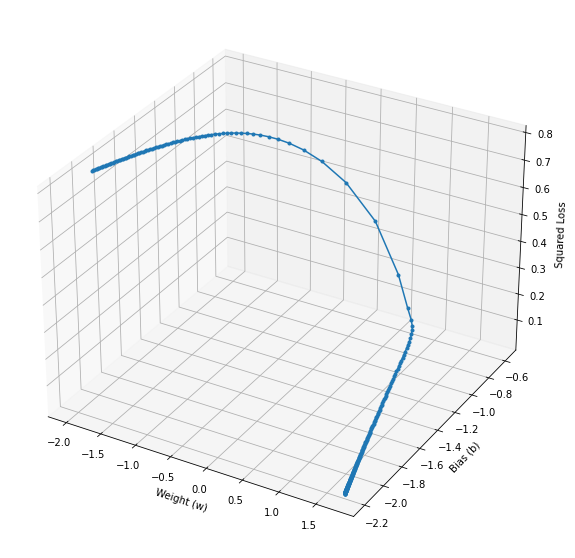

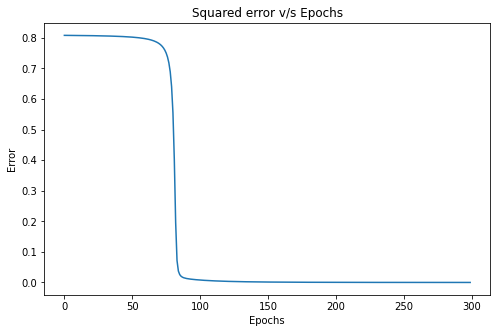

In [37]:
y_hats_mbgd, errors_mbgd, weights_mbgd, biases_mbgd = mini_batch_gd(X, Y)
plotter(y_hats_mbgd, errors_mbgd, weights_mbgd, biases_mbgd)

#### Stochastic Gradient Descent w/ Momentum

In [38]:
def stochastic_gd_w_momentum(X, Y, noofepochs = 300, ß = 0.5):
  w, b = -2, -2
  α = 1
  dw, db, vw, vb = 0, 0, 0, 0
  y_hats, errors, weights, biases = [], [], [], []
  
  for i in range(noofepochs):
    for x, y in zip(X, Y):
      yhat = predict_y(x, w, b)
      sqerror = (y - yhat) ** 2
      dw = delta_w(x, y, yhat)
      db = delta_b(y, yhat)
      vw = ß * vw + (1 - ß) * dw
      vb = ß * vb + (1 - ß) * db
      w += (-α * vw)
      b += (-α * vb)
    y_hats.append(yhat)
    errors.append(sqerror)
    weights.append(w)
    biases.append(b)
  return y_hats, errors, weights, biases

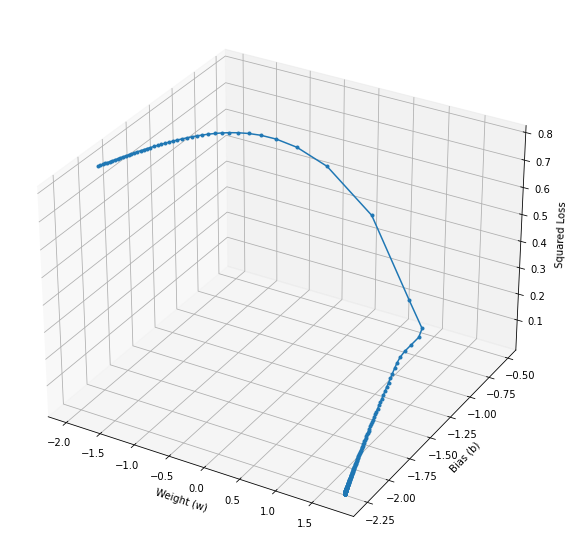

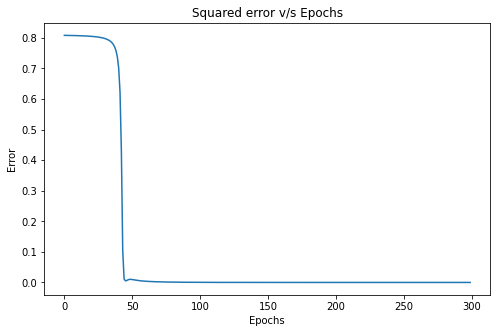

In [39]:
y_hats_sgdm, errors_sgdm, weights_sgdm, biases_sgdm = stochastic_gd_w_momentum(X, Y)
plotter(y_hats_sgdm, errors_sgdm, weights_sgdm, biases_sgdm)

#### Nesterov Accelerated Gradient Descent

In [40]:
def na_gd(X, Y, noofepochs = 300, ß = 0.5):
  α, w, b = 1, -2, -2
  dw, db, vw, vb = 0, 0, 0, 0
  y_hats, errors, weights, biases = [], [], [], []
  
  for i in range(noofepochs):
    for x, y in zip(X, Y):
      w = w - ß * vw      # history first
      b = b - ß * vb
      yhat = predict_y(x, w, b)       # it's "change" returned will be lesser cause already w has changed
      sqerror = (y - yhat) ** 2
      dw = delta_w(x, y, yhat)
      db = delta_b(y, yhat)
      w += (-α * dw)            # current derivative second
      b += (-α * db)
      vw = ß * vw + (1 - ß) * dw      # updating the history too
      vb = ß * vb + (1 - ß) * db
    y_hats.append(yhat)
    errors.append(sqerror)
    weights.append(w)
    biases.append(b)
  return y_hats, errors, weights, biases

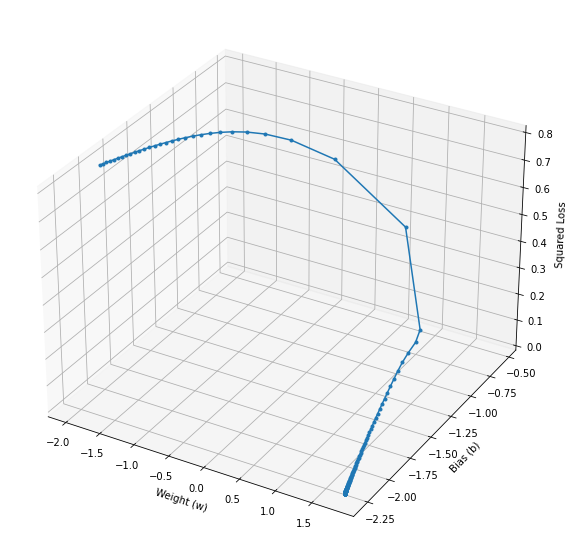

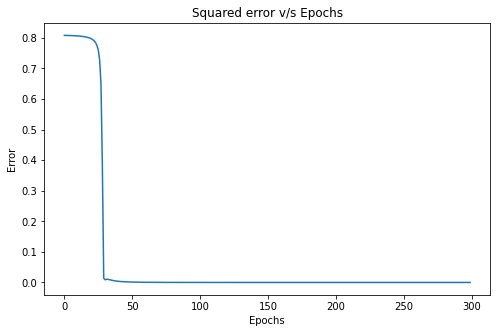

In [41]:
y_hats_nagd, errors_nagd, weights_nagd, biases_nagd = na_gd(X, Y)
plotter(y_hats_nagd, errors_nagd, weights_nagd, biases_nagd)

#### Adaptive Gradient (Adagrad) Optimizer

In [44]:
def adagrad(X, Y, noofepochs = 300, ε = 0.5):
  α, w, b = 1, -2, -2
  dw, db, dw_sq, db_sq = 0, 0, 0, 0, 
  y_hats, errors, weights, biases = [], [], [], []
  for i in range(noofepochs):

    for x, y in zip(X, Y):
      yhat = predict_y(x, w, b)
      sqerror = (y - yhat) ** 2
      dw = delta_w(x, y, yhat)
      db = delta_b(y, yhat)
      dw_sq += dw ** 2
      db_sq += db ** 2
      w += (-α / (dw_sq + ε) ** 0.5) * dw
      b += (-α / (db_sq + ε) ** 0.5) * db
    
    dw_sq, db_sq = 0, 0 
    y_hats.append(yhat)
    errors.append(sqerror)
    weights.append(w)
    biases.append(b)
  return y_hats, errors, weights, biases

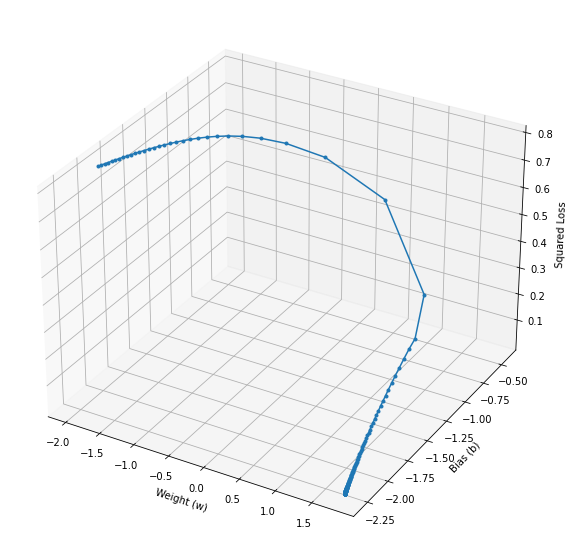

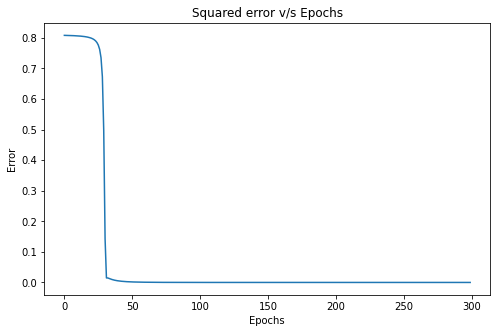

In [45]:
y_hats_adag, errors_adag, weights_adag, biases_adag = adagrad(X, Y)
plotter(y_hats_adag, errors_adag, weights_adag, biases_adag)

#### Adaptive Delta (AdaDelta) - Root Mean Square Propagation(RMSProp) Optimizer